# ShopSmart


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
data=pd.read_csv("shop_smart_ecommerce.csv")
data.head()

cat_col=data.select_dtypes(include=["object"]).columns
num_col=data.select_dtypes(include=["number"]).columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# EDA

In [16]:
from sklearn.impute import SimpleImputer
num=SimpleImputer(strategy='mean')
data[num_col]=num.fit_transform(data[num_col])
cat=SimpleImputer(strategy='most_frequent')
data[cat_col]=cat.fit_transform(data[cat_col])

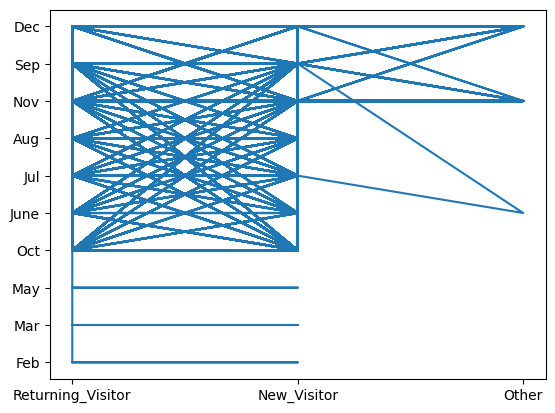

In [22]:
X=data.drop("Revenue",axis=1)
Y=data["Revenue"]


# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
X["VisitorType"]=le.fit_transform(X["VisitorType"])

X = pd.get_dummies(X, columns=["Month"], drop_first=True)


ohe=OneHotEncoder()
X["Revenue"]=ohe.fit_transform(X["Revenue"])

X["Weekend"] = X["Weekend"].astype(int)
# y = y.astype(int)

# Design and Train the Model

In [46]:

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=42,
    # stratify=y  
)
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,r2_score,f1_score
print(f"Accurecy of the Model is {accuracy_score(Y_test,Y_pred)*100}")
print(f"F1 Score of the Model {f1_score(Y_test,Y_pred)}")

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)


Accurecy of the Model is 85.9691808596918
F1 Score of the Model 0.5831325301204819
[[1878  177]
 [ 169  242]]


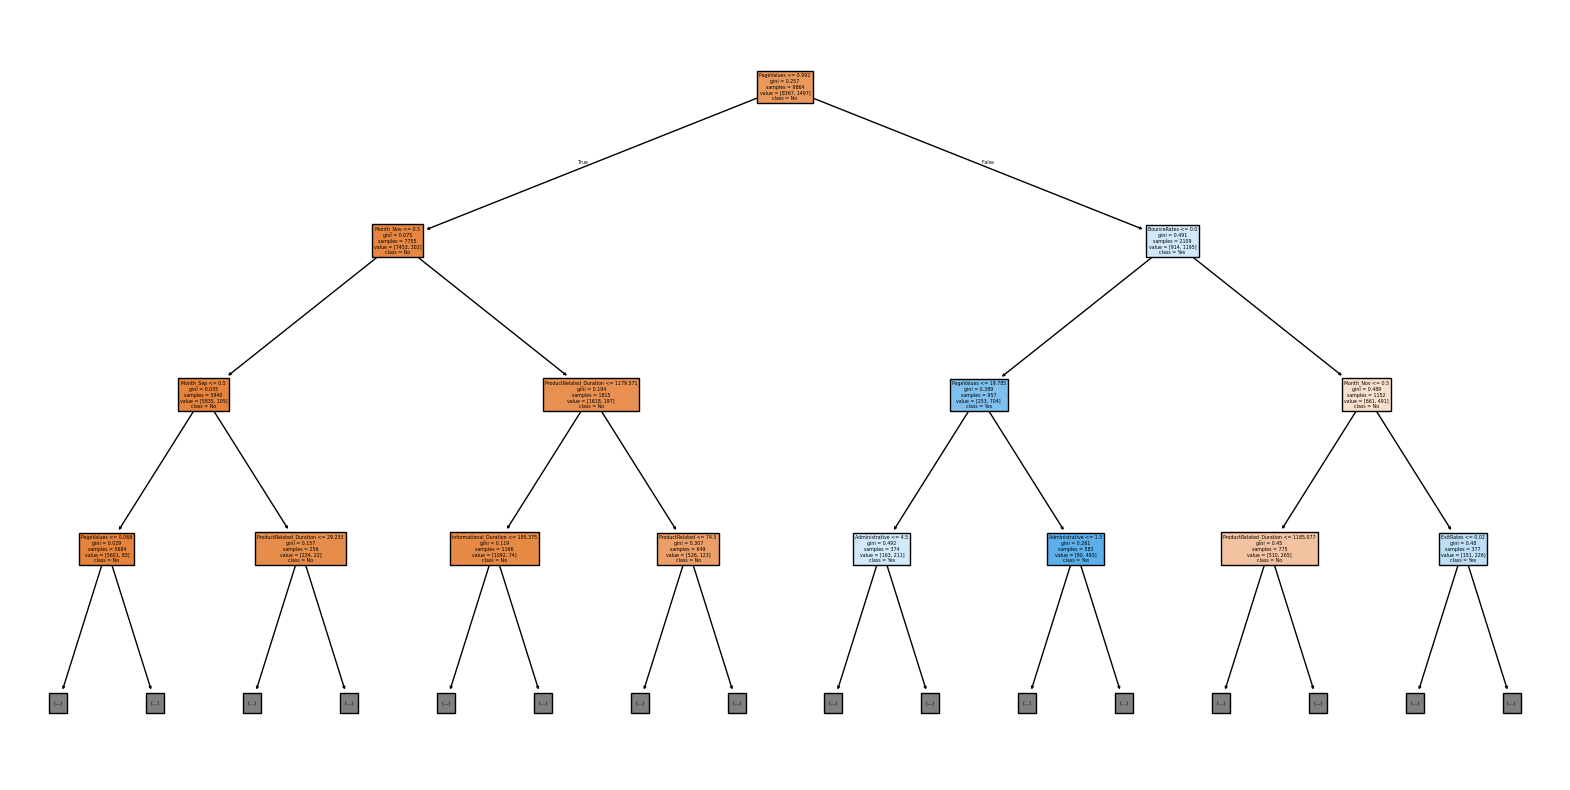

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    max_depth=3      # only show top 3 levels
)
plt.show()


In [ ]:
#The Decision Tree model achieved an F1 score of 0.57, which is higher than the benchmark value of 0.55.
#Hence, the model is suitable for predicting whether a visitor will make a purchase or not